# Create wordclouds from Taylor Swift albums

### Read lyric json file

In [1]:
import glob
import json
import re
import os

In [2]:
# Get the file list for all lyrics
lyrics_arr = glob.glob('lyrics_*.json')

In [3]:
list_json = []
for lyric_file in lyrics_arr:
    #print(lyric_file)
    with open (lyric_file) as json_file:
        data_json = json.load(json_file)
        print(data_json['name'])
        list_json.append(data_json)

1989 (Taylor’s Version)
evermore (deluxe version)
Fearless (Taylor’s Version)
folklore (deluxe version)
Lover
Midnights (3am Edition)
Red (Taylor’s Version)
reputation
Speak Now (Taylor’s Version)
Taylor Swift


## Check the content of the lyrics

In [4]:
first_json = list_json[0]

In [5]:
first_json['name']

'1989 (Taylor’s Version)'

In [6]:
with open("first_json.json", "w") as f:
    json.dump(first_json, f)

In [7]:
len(first_json['tracks'])

22

In [8]:
first_json['tracks'][20]['song']['title']

'Is It Over Now? (Taylor’s Version) [From The Vault]'

In [9]:
first_json['tracks'][20]['song']['lyrics']

'157 ContributorsTranslationsPortuguêsEspañolFrançaisСрпскиSvenskaItalianoالعربيةDeutschTürkçeУкраїнськаPolskiРусскийIs It Over Now? (Taylor’s Version)  Lyrics\n(Is it? Is it? Is it? Is it? Is it?)\n\nOnce the flight had flown (Uh-huh)\nWith the wilt of the rose (Uh-huh)\nI slept all alone (Uh-huh)\nYou still wouldn\'t go\n\nLet\'s fast forward to three hundred takeout coffees later\nI see your profile and your smile on unsuspecting waiters\nYou dream of my mouth before it called you a lying traitor\nYou search in every maiden\'s bed for somethin\' greater, baby\n\nWas it over when she laid down on your couch?\nWas it over when he unbuttoned my blouse?\n"Come here," I whispered in your ear\nIn your dream as you passеd out, baby\nWas it over then? And is it over now?\n\n(Is it? Is it? Is it?)\n\nWhеn you lost control (Uh-huh)\nRed blood, white snow (Uh-huh)\nBlue dress on a boat (Uh-huh)\nYour new girl is my clone\nYou might also like\nAnd did you think I didn\'t see you?\nThere were fl

In [10]:
def strip_head_tail_from_lyrics(lyrics_string, song_title):
    
    #exclude_head = song_title + " Lyrics"
    exclude_head = " Lyrics"
    
    start_idx = 0
    end_idx = len(lyrics_string) - 1
    
    # Get the starting position
    idx = lyrics_string.find(exclude_head)
    if idx > -1:
        start_idx = idx + len(exclude_head)
    
    # Get the ending position
    tail_pattern = '[0-9]+Embed$'
    match = re.search(tail_pattern, lyrics_string)
    if match:
        end_idx = match.start()
    
    return lyrics_string[start_idx:end_idx]    

In [11]:
print(strip_head_tail_from_lyrics(first_json['tracks'][20]['song']['lyrics'], first_json['tracks'][20]['song']['title']))


(Is it? Is it? Is it? Is it? Is it?)

Once the flight had flown (Uh-huh)
With the wilt of the rose (Uh-huh)
I slept all alone (Uh-huh)
You still wouldn't go

Let's fast forward to three hundred takeout coffees later
I see your profile and your smile on unsuspecting waiters
You dream of my mouth before it called you a lying traitor
You search in every maiden's bed for somethin' greater, baby

Was it over when she laid down on your couch?
Was it over when he unbuttoned my blouse?
"Come here," I whispered in your ear
In your dream as you passеd out, baby
Was it over then? And is it over now?

(Is it? Is it? Is it?)

Whеn you lost control (Uh-huh)
Red blood, white snow (Uh-huh)
Blue dress on a boat (Uh-huh)
Your new girl is my clone
You might also like
And did you think I didn't see you?
There were flashin' lights
At least I had the decency
To keep my nights out of sight
Only rumors 'bout my hips and thighs
And my whispered sighs
Oh, Lord, I think about jumpin'
Off of very tall somethings

In [12]:
def print_all_tracks(all_tracks_json):
    for i in range(len(all_tracks_json)):
        cur_json = all_tracks_json[i]
        print("--- {} ---".format(cur_json['name']))
        for j in range(len(cur_json['tracks'])):
            print(cur_json['tracks'][j]['song']['title'])

In [13]:
print_all_tracks(list_json)

--- 1989 (Taylor’s Version) ---
Welcome To New York (Taylor’s Version)
Blank Space (Taylor’s Version)
Style (Taylor’s Version)
Out Of The Woods (Taylor’s Version)
All You Had To Do Was Stay (Taylor’s Version)
Shake It Off (Taylor’s Version)
I Wish You Would (Taylor’s Version)
Bad Blood (Taylor’s Version)
Wildest Dreams (Taylor’s Version)
How You Get The Girl (Taylor’s Version)
This Love (Taylor’s Version)
I Know Places (Taylor’s Version)
Clean (Taylor’s Version)
Wonderland (Taylor’s Version)
You Are In Love (Taylor’s Version)
New Romantics (Taylor’s Version)
“Slut!” (Taylor’s Version) [From The Vault]
Say Don’t Go (Taylor’s Version) [From The Vault]
Now That We Don’t Talk (Taylor’s Version) [From The Vault]
Suburban Legends (Taylor’s Version) [From The Vault]
Is It Over Now? (Taylor’s Version) [From The Vault]
1989 (Taylor’s Version) [Prologue]
--- evermore (deluxe version) ---
​willow
​champagne problems
​gold rush
​’tis the damn season
​tolerate it
​no body, no crime
​happiness
​doro

In [14]:
# I exclude tracks that includes these keywords in its title
exclusion_keywords = ["[Prologue]", "[Poem]", "Reputation Magazine", "Remix", "(Pop Version)", "A Message From Taylor", "[Foreword]", "[Liner Notes]"]    

## Extract all lyrics in an album and concatenate them to create input text for wordcloud

In [15]:
albums_list = []
for cur_json in list_json:
    album_dict = {}
    album_dict['album_title'] = cur_json['name']
    album_dict['album_all_lyrics'] = ""
    album_tracks = []
    print("--- {} --- ".format(album_dict['album_title']))
    for j in range(len(cur_json['tracks'])):
        result = map(lambda x: x in cur_json['tracks'][j]['song']['title'], exclusion_keywords)
        if True in result:
            break
            
        album_track_dict = {}
        album_track_dict['track_title'] = cur_json['tracks'][j]['song']['title']
        #album_track_dict['track_lyric'] = cur_json['tracks'][j]['song']['lyrics']
        track_lyrics = strip_head_tail_from_lyrics(cur_json['tracks'][j]['song']['lyrics'], \
                                                                      cur_json['tracks'][j]['song']['title'])
        album_track_dict['track_lyrics'] = track_lyrics
        album_tracks.append(album_track_dict)
        album_dict['album_all_lyrics'] = album_dict['album_all_lyrics'] + ' ' + track_lyrics
    
    album_dict['album_tracks'] = album_tracks
    albums_list.append(album_dict)

--- 1989 (Taylor’s Version) --- 
--- evermore (deluxe version) --- 
--- Fearless (Taylor’s Version) --- 
--- folklore (deluxe version) --- 
--- Lover --- 
--- Midnights (3am Edition) --- 
--- Red (Taylor’s Version) --- 
--- reputation --- 
--- Speak Now (Taylor’s Version) --- 
--- Taylor Swift --- 


In [16]:
len(albums_list)

10

## Create wordcloud for each album

In [17]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import random

In [18]:
# test
test_text = albums_list[0]['album_all_lyrics']
#print(test_text)
wordcloud = WordCloud().generate(test_text)

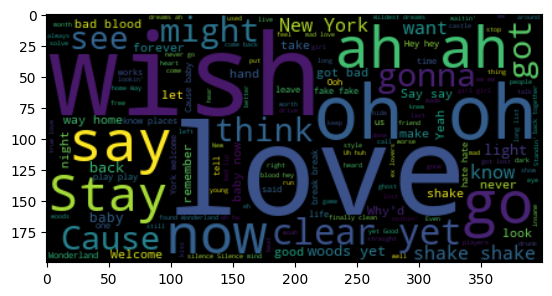

In [19]:
plt.imshow(wordcloud, interpolation='bilinear')

## Improvement

There are common words showing up larger (more frequent). I would like to control stopwords a bit more.

In [20]:
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [21]:
stopwords = set(map(str.strip, open('stopwords.txt').readlines()))

Add functions to adjust text colors in wordcloud.

In [22]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [23]:
def brighter_cmap(cmap_name, min=0.1, max=0.75):
    r_cmap = mpl.colormaps[cmap_name].resampled(16)
    return ListedColormap(r_cmap(np.linspace(min, max, 16)))

In [24]:
def show_wordcloud(n, background_color='black', colormap=None, color_func=None):
    text = albums_list[n]['album_all_lyrics']
    wc = WordCloud(relative_scaling=0.4, min_word_length=3, min_font_size=8, max_font_size=90, \
                   background_color=background_color, colormap=colormap, stopwords=stopwords, \
                   color_func=color_func, scale=2).generate(text)
    #print(" --- {} ---".format(albums_list[n]['album_title']), flush=True)
    plt.title(albums_list[n]['album_title'])
    plt.axis("off")
    plt.imshow(wc, interpolation='bilinear')

    save_file = os.path.join("images", albums_list[n]['album_title'] + '.jpg')
    #plt.savefig(save_file)
    wc.to_file(save_file)

## Create wordclouds for all albums

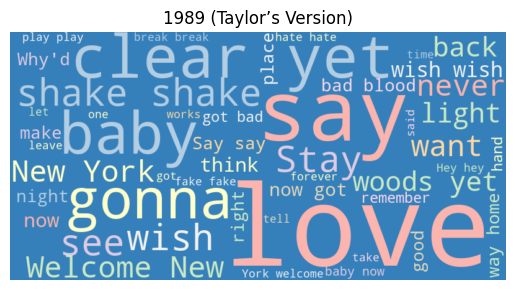

In [25]:
show_wordcloud(0, background_color='#3580BB', colormap='Pastel1')

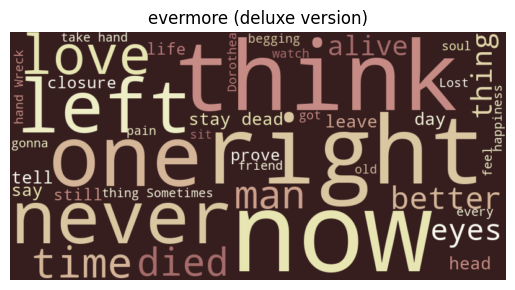

In [26]:
show_wordcloud(1, background_color='#361E1E', colormap=brighter_cmap('pink', min=0.3, max=0.9))

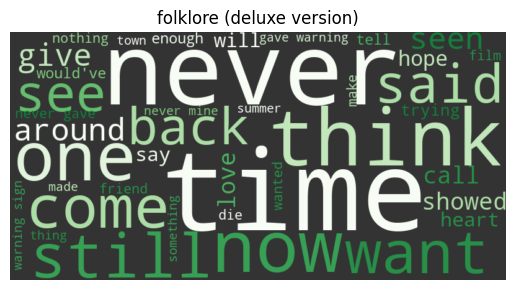

In [35]:
show_wordcloud(3, background_color='#333333', colormap=brighter_cmap('Greens', min=0, max=0.8))

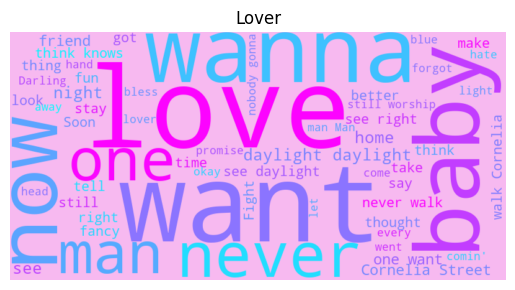

In [28]:
show_wordcloud(4, background_color='#F7B9F0', colormap='cool')

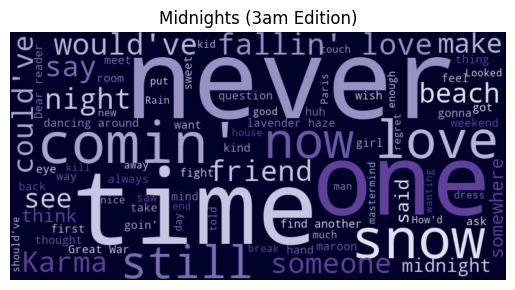

In [29]:
show_wordcloud(5, background_color='#000129', colormap=brighter_cmap('Purples', min=0.2, max=0.8))

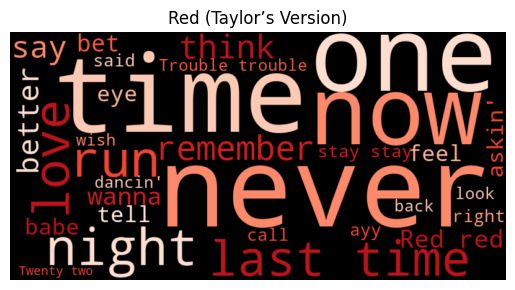

In [30]:
show_wordcloud(6, background_color='#000000', colormap=brighter_cmap('Reds', max=0.8))

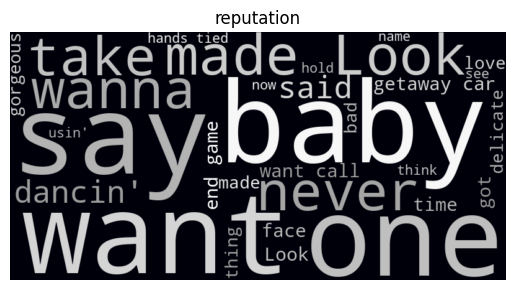

In [37]:
show_wordcloud(7, background_color='#00000A', color_func=grey_color_func)

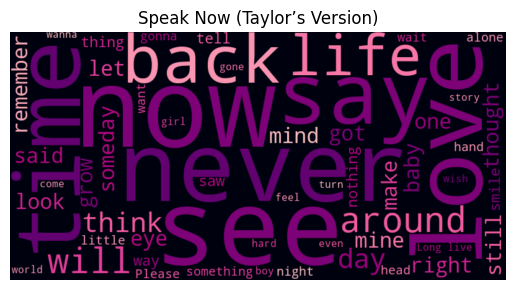

In [32]:
show_wordcloud(8, background_color='#00010F', colormap=brighter_cmap('RdPu', min=0.3, max=0.9))

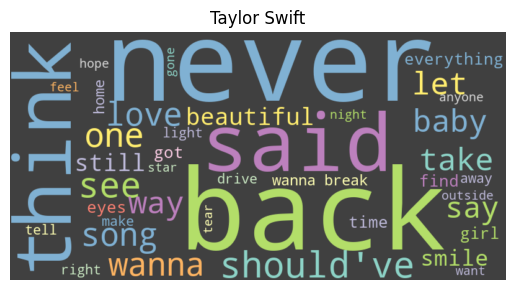

In [33]:
show_wordcloud(9, background_color='#404040', colormap="Set3")

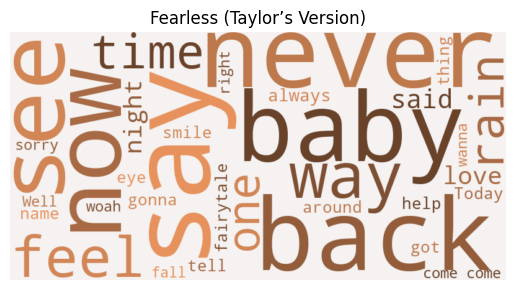

In [39]:
show_wordcloud(2, background_color='#F5F2F1', colormap=brighter_cmap("copper", min=0.3))